# 搭建神经网络进行气温预测

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from  tensorflow.keras  import layers
import tensorflow.keras
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
feartures  = pd.read_csv('./data/temps.csv')
feartures.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [16]:
feartures.shape

(348, 9)

In [17]:
# 处理时间
import datetime

years = feartures['year']
months = feartures['month']
days = feartures['day']

dates = [str(int(year))+ '-' + str(int(month))+'-' + str(int(day)) for year, month,day in zip(years ,months, days)]
dates = [datetime.datetime.strptime(date , "%Y-%m-%d") for date in dates]

dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

In [18]:
# 对周几进行one_hot 编码
feartures = pd.get_dummies(feartures)
feartures.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,True,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,44,61,False,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,41,56,False,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,40,53,False,True,False,False,False,False,False
4,2016,1,5,41,40,46.0,44,41,False,False,False,False,False,True,False


In [19]:
labels = np.array(feartures['actual'])
# 将标签剔除
feartures = feartures.drop('actual' ,axis = 1)
# 记录所有属性
feartures_list = list(feartures.columns)
# 转化为array格式
feartures  = np.array(feartures)

In [ ]:
feartures.shape

(348, 14)

In [27]:
# 数据标准化
from sklearn.preprocessing import StandardScaler
input_feartures = StandardScaler().fit_transform(feartures)

## 基于keras构建网络模型

In [28]:
model = tf.keras.Sequential()
model.add(layers.Dense(16))
model.add(layers.Dense(32))
model.add(layers.Dense(1))

In [29]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001),
    loss = 'mean_squared_error'
)

In [30]:
model.fit(input_feartures ,labels , validation_split = 0.2 , epochs=10 , batch_size=64)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 4337.0918 - val_loss: 3074.3574
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2328.1296 - val_loss: 2810.8118
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 122.0536 - val_loss: 951.5140
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 100.7199 - val_loss: 619.5522
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 47.9988 - val_loss: 305.8567
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 35.3704 - val_loss: 192.5789
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 36.5093 - val_loss: 117.7698
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 33.8950 - val_loss: 87.0324
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 31.4816 - val_loss: 81.1397
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 30.5074 - val_loss: 49.8269


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 819 (3.20 KB)

 Trainable params: 817 (3.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [33]:
model1 = tf.keras.Sequential()
model1.add(layers.Dense(16,kernel_initializer = 'random_normal'))
model1.add(layers.Dense(32,kernel_initializer = 'random_normal'))
model1.add(layers.Dense(1,kernel_initializer = 'random_normal'))

In [34]:
model1.compile(
    optimizer = tf.keras.optimizers.SGD(0.001),
    loss = 'mean_squared_error'
)

In [35]:
model1.fit(input_feartures ,labels , validation_split = 0.2 , epochs=10 , batch_size=64)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 4345.9536 - val_loss: 2661.5037
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4268.0737 - val_loss: 2576.3411
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4223.3496 - val_loss: 2446.5176
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3818.4834 - val_loss: 2264.8381
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2066.3484 - val_loss: 1498.0431
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 87.9691 - val_loss: 755.8951
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 51.4183 - val_loss: 439.0948
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 63.3442 - val_loss: 239.5347
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 28.3223 - val_loss: 122.1845
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 30.6910 - val_loss: 93.7594


In [46]:
pred = model1.predict(input_feartures)
pred.shape

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(348, 1)

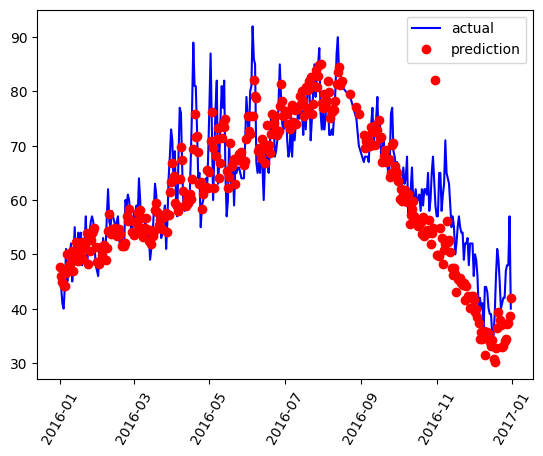

In [49]:
import matplotlib.pyplot as plt
# 转换日期格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# 创建一个表格来存日期和对应的标签数值
true_data = pd.DataFrame(data={'date': dates, 'actual': labels})

# 同理，再创建一个来存日期和对应的模型预测值
months = feartures[:, feartures_list.index('month')]
days = feartures[:, feartures_list.index('day')]
years = feartures[:, feartures_list.index('year')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data={'date': test_dates, 'prediction': pred.reshape(-1)})

# 真实值
plt.plot(true_data['date'], true_data['actual'], 'b-', label='actual')

# 预测值
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label='prediction')
plt.xticks(rotation=60)
plt.legend()